In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import time

from scipy.integrate import odeint # 一阶常微分方程组的数值程序

import torch
import torchvision
import torchvision.datasets as dsets
import torchvision.transforms as transforms

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
from torch.nn import init
from torch.utils import data
from dtw import *
from numpy import polyfit, poly1d

In [3]:
#构建数据集

def logi(x,r): # 定义 logistic map
    return r*x*(1-x)

def logitime(x,r,m): # 生成 logistic map 训练集
    X=torch.zeros(m)
    Y=torch.zeros(m)
    for i in torch.arange(0,m):
        X[i]=x
        x=logi(x,r)
        Y[i]=x
    return X,Y

In [4]:
r3=1+2*np.sqrt(2)
x3=0.5
#去暂态
for i in range(500):
    x3=logi(x3,r3)

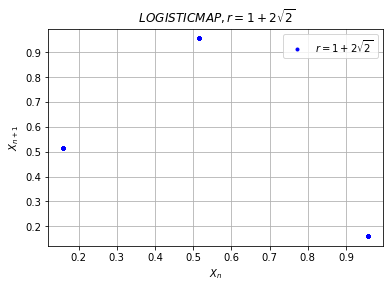

In [5]:
xt0,r0,m0=x3,r3,200
X0,Y0=logitime(xt0,r0,m0)
X0=X0.reshape(-1,1)
Y0=Y0.reshape(-1,1)
#plt.figure(figsize=(16, 8))
plt.title(" $LOGISTIC MAP,r=1+2\sqrt{2}$")
plt.xlabel("$X_{n}$")
plt.ylabel("$X_{n+1}$")
plt.plot(X0.cpu(),Y0.cpu(),'b.',label="$r=1+2\sqrt{2}$")
plt.legend(loc=0)
plt.grid(True)

In [6]:
#数据集分割
XTR0=X0[0:120];YTR0=Y0[0:120] #训练集
XTE0=X0[120:200];YTE0=Y0[120:200]  #测试集

In [7]:
def load_array(data_arrays, batch_size, is_train=False):
    dataset=data.TensorDataset(*data_arrays)
    return data.DataLoader(dataset, batch_size, shuffle=is_train)


In [8]:
def train_epoch_ann(net,train_iter,XTR,YTR,criterion,optimizer):
    net.train()
    for X,Y in train_iter:
        loss=criterion(net(X),Y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    losses=criterion(net(XTR),YTR)
    return losses

In [9]:
def test_epoch_ann(net,XTE,YTE,criterion):
    net.eval()
    loss=criterion(net(XTE),YTE)
    return loss

In [10]:
def train_ann(net,train_iter,XTR,YTR,XTE,YTE,num_epochs,num_period,testvalue,criterion,optimizer):
    trainloss=torch.zeros(num_epochs)
    testloss=torch.zeros(num_epochs)
    for epoch in range(num_epochs):
        trainloss[epoch]=train_epoch_ann(net,train_iter,XTR,YTR,criterion,optimizer)
        testloss[epoch]=test_epoch_ann(net,XTE,YTE,criterion)
        if (epoch+1)%100==0:
            print('*'*10)
            print('epoch{}'.format(epoch+1))
            print('train_loss is{:.8f}'.format(trainloss[epoch]),'','and','','test_loss is{:.8f}'.format(testloss[epoch])) 
    return min(trainloss),min(testloss)

In [22]:
total_min_trainloss=np.zeros((14,10))
total_min_testloss=np.zeros((14,10))

In [23]:
batch_size=1
num_epochs=1500
num_period=100
test_value=0.5
learn_rate=0.025

# Net1

In [24]:

train_iter=load_array((XTR0,YTR0),batch_size)

for i in range(10):
    Net1=nn.Sequential(nn.Linear(1,10),nn.Sigmoid(),nn.Linear(10,10),nn.Sigmoid(),nn.Linear(10,10),nn.Sigmoid(),nn.Linear(10,1))
    for layer in Net1:
        if isinstance(layer, nn.Linear): # 判断是否是线性层
            param_shape = layer.weight.shape
            layer.weight.data = torch.from_numpy(np.random.uniform(-0.5, 0.5, size=param_shape).astype(np.float32)) 
    optimizerSGD=torch.optim.SGD(Net1.parameters(),lr=learn_rate) 
    criterionMSE=nn.MSELoss()
    total_min_trainloss[0,i],total_min_testloss[0,i]=train_ann(Net1,train_iter,XTR0,YTR0,XTE0,YTE0,num_epochs,num_period,test_value,criterionMSE,optimizerSGD)

**********
epoch100
train_loss is0.09824342  and  test_loss is0.09806804
**********
epoch200
train_loss is0.07422965  and  test_loss is0.07486498
**********
epoch300
train_loss is0.06190922  and  test_loss is0.06256596
**********
epoch400
train_loss is0.04614903  and  test_loss is0.04670212
**********
epoch500
train_loss is0.00000024  and  test_loss is0.00000023
**********
epoch600
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch700
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch800
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch900
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch1000
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch1100
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch1200
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch1300
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch1400
train_loss is0.00000000  a

**********
epoch800
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch900
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch1000
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch1100
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch1200
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch1300
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch1400
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch1500
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch100
train_loss is0.09842418  and  test_loss is0.09824459
**********
epoch200
train_loss is0.07725284  and  test_loss is0.07786813
**********
epoch300
train_loss is0.06781878  and  test_loss is0.06848682
**********
epoch400
train_loss is0.05074553  and  test_loss is0.05134442
**********
epoch500
train_loss is0.01076251  and  test_loss is0.01089308
**********
epoch600
train_loss is0.00000000  

# Net2

In [25]:

train_iter=load_array((XTR0,YTR0),batch_size)

for i in range(10):
    Net2=nn.Sequential(nn.Linear(1,10),nn.Sigmoid(),nn.Linear(10,10),nn.Sigmoid(),nn.Linear(10,10),nn.Sigmoid(),nn.Linear(10,1))
    for layer in Net2:
        if isinstance(layer, nn.Linear): # 判断是否是线性层
            param_shape = layer.weight.shape
            layer.weight.data = torch.from_numpy(np.random.uniform(-1.0, 1.0, size=param_shape).astype(np.float32)) 
    optimizerSGD=torch.optim.SGD(Net2.parameters(),lr=learn_rate) 
    criterionMSE=nn.MSELoss()
    total_min_trainloss[1,i],total_min_testloss[1,i]=train_ann(Net2,train_iter,XTR0,YTR0,XTE0,YTE0,num_epochs,num_period,test_value,criterionMSE,optimizerSGD)

**********
epoch100
train_loss is0.07195916  and  test_loss is0.07260467
**********
epoch200
train_loss is0.04470230  and  test_loss is0.04522824
**********
epoch300
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch400
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch500
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch600
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch700
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch800
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch900
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch1000
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch1100
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch1200
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch1300
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch1400
train_loss is0.00000000  a

**********
epoch800
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch900
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch1000
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch1100
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch1200
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch1300
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch1400
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch1500
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch100
train_loss is0.07343574  and  test_loss is0.07408370
**********
epoch200
train_loss is0.04701021  and  test_loss is0.04756352
**********
epoch300
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch400
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch500
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch600
train_loss is0.00000000  

# Net3

In [26]:

train_iter=load_array((XTR0,YTR0),batch_size)

for i in range(10):
    Net3=nn.Sequential(nn.Linear(1,10),nn.Sigmoid(),nn.Linear(10,10),nn.Sigmoid(),nn.Linear(10,10),nn.Sigmoid(),nn.Linear(10,1))
    for layer in Net3:
        if isinstance(layer, nn.Linear): # 判断是否是线性层
            param_shape = layer.weight.shape
            layer.weight.data = torch.from_numpy(np.random.uniform(-1.5, 1.5, size=param_shape).astype(np.float32)) 
    optimizerSGD=torch.optim.SGD(Net3.parameters(),lr=learn_rate) 
    criterionMSE=nn.MSELoss()
    total_min_trainloss[2,i],total_min_testloss[2,i]=train_ann(Net3,train_iter,XTR0,YTR0,XTE0,YTE0,num_epochs,num_period,test_value,criterionMSE,optimizerSGD)

**********
epoch100
train_loss is0.06327941  and  test_loss is0.06392808
**********
epoch200
train_loss is0.00000949  and  test_loss is0.00000956
**********
epoch300
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch400
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch500
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch600
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch700
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch800
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch900
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch1000
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch1100
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch1200
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch1300
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch1400
train_loss is0.00000000  a

**********
epoch800
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch900
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch1000
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch1100
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch1200
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch1300
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch1400
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch1500
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch100
train_loss is0.01403055  and  test_loss is0.01418706
**********
epoch200
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch300
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch400
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch500
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch600
train_loss is0.00000000  

# Net4

In [27]:

train_iter=load_array((XTR0,YTR0),batch_size)

for i in range(10):
    Net4=nn.Sequential(nn.Linear(1,10),nn.Sigmoid(),nn.Linear(10,10),nn.Sigmoid(),nn.Linear(10,10),nn.Sigmoid(),nn.Linear(10,1))
    for layer in Net4:
        if isinstance(layer, nn.Linear): # 判断是否是线性层
            param_shape = layer.weight.shape
            layer.weight.data = torch.from_numpy(np.random.uniform(-2.0, 2.0, size=param_shape).astype(np.float32)) 
    optimizerSGD=torch.optim.SGD(Net4.parameters(),lr=learn_rate) 
    criterionMSE=nn.MSELoss()
    total_min_trainloss[3,i],total_min_testloss[3,i]=train_ann(Net4,train_iter,XTR0,YTR0,XTE0,YTE0,num_epochs,num_period,test_value,criterionMSE,optimizerSGD)

**********
epoch100
train_loss is0.00031048  and  test_loss is0.00031372
**********
epoch200
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch300
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch400
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch500
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch600
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch700
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch800
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch900
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch1000
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch1100
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch1200
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch1300
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch1400
train_loss is0.00000000  a

**********
epoch800
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch900
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch1000
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch1100
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch1200
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch1300
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch1400
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch1500
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch100
train_loss is0.00000007  and  test_loss is0.00000007
**********
epoch200
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch300
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch400
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch500
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch600
train_loss is0.00000000  

# Net5

In [28]:

train_iter=load_array((XTR0,YTR0),batch_size)

for i in range(10):
    Net5=nn.Sequential(nn.Linear(1,10),nn.Sigmoid(),nn.Linear(10,10),nn.Sigmoid(),nn.Linear(10,10),nn.Sigmoid(),nn.Linear(10,1))
    for layer in Net5:
        if isinstance(layer, nn.Linear): # 判断是否是线性层
            param_shape = layer.weight.shape
            layer.weight.data = torch.from_numpy(np.random.uniform(-2.5, 2.5, size=param_shape).astype(np.float32)) 
    optimizerSGD=torch.optim.SGD(Net5.parameters(),lr=learn_rate) 
    criterionMSE=nn.MSELoss()
    total_min_trainloss[4,i],total_min_testloss[4,i]=train_ann(Net5,train_iter,XTR0,YTR0,XTE0,YTE0,num_epochs,num_period,test_value,criterionMSE,optimizerSGD)

**********
epoch100
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch200
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch300
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch400
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch500
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch600
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch700
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch800
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch900
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch1000
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch1100
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch1200
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch1300
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch1400
train_loss is0.00000000  a

**********
epoch800
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch900
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch1000
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch1100
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch1200
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch1300
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch1400
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch1500
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch100
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch200
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch300
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch400
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch500
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch600
train_loss is0.00000000  

# Net6

In [29]:

train_iter=load_array((XTR0,YTR0),batch_size)

for i in range(10):
    Net6=nn.Sequential(nn.Linear(1,10),nn.Sigmoid(),nn.Linear(10,10),nn.Sigmoid(),nn.Linear(10,10),nn.Sigmoid(),nn.Linear(10,1))
    for layer in Net6:
        if isinstance(layer, nn.Linear): # 判断是否是线性层
            param_shape = layer.weight.shape
            layer.weight.data = torch.from_numpy(np.random.uniform(-3.0, 3.0, size=param_shape).astype(np.float32)) 
    optimizerSGD=torch.optim.SGD(Net6.parameters(),lr=learn_rate) 
    criterionMSE=nn.MSELoss()
    total_min_trainloss[5,i],total_min_testloss[5,i]=train_ann(Net6,train_iter,XTR0,YTR0,XTE0,YTE0,num_epochs,num_period,test_value,criterionMSE,optimizerSGD)

**********
epoch100
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch200
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch300
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch400
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch500
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch600
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch700
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch800
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch900
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch1000
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch1100
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch1200
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch1300
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch1400
train_loss is0.00000000  a

**********
epoch800
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch900
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch1000
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch1100
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch1200
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch1300
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch1400
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch1500
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch100
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch200
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch300
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch400
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch500
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch600
train_loss is0.00000000  

# Net7

In [30]:

train_iter=load_array((XTR0,YTR0),batch_size)

for i in range(10):
    Net7=nn.Sequential(nn.Linear(1,10),nn.Sigmoid(),nn.Linear(10,10),nn.Sigmoid(),nn.Linear(10,10),nn.Sigmoid(),nn.Linear(10,1))
    for layer in Net7:
        if isinstance(layer, nn.Linear): # 判断是否是线性层
            param_shape = layer.weight.shape
            layer.weight.data = torch.from_numpy(np.random.uniform(-3.5, 3.5, size=param_shape).astype(np.float32)) 
    optimizerSGD=torch.optim.SGD(Net7.parameters(),lr=learn_rate) 
    criterionMSE=nn.MSELoss()
    total_min_trainloss[6,i],total_min_testloss[6,i]=train_ann(Net7,train_iter,XTR0,YTR0,XTE0,YTE0,num_epochs,num_period,test_value,criterionMSE,optimizerSGD)

**********
epoch100
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch200
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch300
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch400
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch500
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch600
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch700
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch800
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch900
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch1000
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch1100
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch1200
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch1300
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch1400
train_loss is0.00000000  a

**********
epoch800
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch900
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch1000
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch1100
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch1200
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch1300
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch1400
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch1500
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch100
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch200
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch300
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch400
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch500
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch600
train_loss is0.00000000  

# Net8

In [31]:

train_iter=load_array((XTR0,YTR0),batch_size)

for i in range(10):
    Net8=nn.Sequential(nn.Linear(1,10),nn.Sigmoid(),nn.Linear(10,10),nn.Sigmoid(),nn.Linear(10,10),nn.Sigmoid(),nn.Linear(10,1))
    for layer in Net8:
        if isinstance(layer, nn.Linear): # 判断是否是线性层
            param_shape = layer.weight.shape
            layer.weight.data = torch.from_numpy(np.random.uniform(-4.0, 4.0, size=param_shape).astype(np.float32)) 
    optimizerSGD=torch.optim.SGD(Net8.parameters(),lr=learn_rate) 
    criterionMSE=nn.MSELoss()
    total_min_trainloss[7,i],total_min_testloss[7,i]=train_ann(Net8,train_iter,XTR0,YTR0,XTE0,YTE0,num_epochs,num_period,test_value,criterionMSE,optimizerSGD)

**********
epoch100
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch200
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch300
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch400
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch500
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch600
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch700
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch800
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch900
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch1000
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch1100
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch1200
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch1300
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch1400
train_loss is0.00000000  a

**********
epoch800
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch900
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch1000
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch1100
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch1200
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch1300
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch1400
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch1500
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch100
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch200
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch300
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch400
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch500
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch600
train_loss is0.00000000  

# Net9

In [63]:

train_iter=load_array((XTR0,YTR0),batch_size)

for i in range(10):
    Net9=nn.Sequential(nn.Linear(1,10),nn.Sigmoid(),nn.Linear(10,10),nn.Sigmoid(),nn.Linear(10,10),nn.Sigmoid(),nn.Linear(10,1))
    for layer in Net9:
        if isinstance(layer, nn.Linear): # 判断是否是线性层
            param_shape = layer.weight.shape
            layer.weight.data = torch.from_numpy(np.random.uniform(-4.5, 4.5, size=param_shape).astype(np.float32)) 
    optimizerSGD=torch.optim.SGD(Net9.parameters(),lr=learn_rate) 
    criterionMSE=nn.MSELoss()
    total_min_trainloss[8,i],total_min_testloss[8,i]=train_ann(Net9,train_iter,XTR0,YTR0,XTE0,YTE0,num_epochs,num_period,test_value,criterionMSE,optimizerSGD)

**********
epoch100
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch200
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch300
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch400
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch500
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch600
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch700
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch800
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch900
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch1000
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch1100
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch1200
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch1300
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch1400
train_loss is0.00000000  a

**********
epoch800
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch900
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch1000
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch1100
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch1200
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch1300
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch1400
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch1500
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch100
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch200
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch300
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch400
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch500
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch600
train_loss is0.00000000  

# Net10

In [33]:

train_iter=load_array((XTR0,YTR0),batch_size)

for i in range(10):
    Net10=nn.Sequential(nn.Linear(1,10),nn.Sigmoid(),nn.Linear(10,10),nn.Sigmoid(),nn.Linear(10,10),nn.Sigmoid(),nn.Linear(10,1))
    for layer in Net10:
        if isinstance(layer, nn.Linear): # 判断是否是线性层
            param_shape = layer.weight.shape
            layer.weight.data = torch.from_numpy(np.random.uniform(-5.0, 5.0, size=param_shape).astype(np.float32)) 
    optimizerSGD=torch.optim.SGD(Net10.parameters(),lr=learn_rate) 
    criterionMSE=nn.MSELoss()
    total_min_trainloss[9,i],total_min_testloss[9,i]=train_ann(Net10,train_iter,XTR0,YTR0,XTE0,YTE0,num_epochs,num_period,test_value,criterionMSE,optimizerSGD)

**********
epoch100
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch200
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch300
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch400
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch500
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch600
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch700
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch800
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch900
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch1000
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch1100
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch1200
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch1300
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch1400
train_loss is0.00000000  a

**********
epoch800
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch900
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch1000
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch1100
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch1200
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch1300
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch1400
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch1500
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch100
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch200
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch300
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch400
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch500
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch600
train_loss is0.00000000  

# Net11

In [34]:

train_iter=load_array((XTR0,YTR0),batch_size)

for i in range(10):
    Net11=nn.Sequential(nn.Linear(1,10),nn.Sigmoid(),nn.Linear(10,10),nn.Sigmoid(),nn.Linear(10,10),nn.Sigmoid(),nn.Linear(10,1))
    for layer in Net11:
        if isinstance(layer, nn.Linear): # 判断是否是线性层
            param_shape = layer.weight.shape
            layer.weight.data = torch.from_numpy(np.random.uniform(-5.5, 5.5, size=param_shape).astype(np.float32)) 
    optimizerSGD=torch.optim.SGD(Net11.parameters(),lr=learn_rate) 
    criterionMSE=nn.MSELoss()
    total_min_trainloss[10,i],total_min_testloss[10,i]=train_ann(Net11,train_iter,XTR0,YTR0,XTE0,YTE0,num_epochs,num_period,test_value,criterionMSE,optimizerSGD)

**********
epoch100
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch200
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch300
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch400
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch500
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch600
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch700
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch800
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch900
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch1000
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch1100
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch1200
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch1300
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch1400
train_loss is0.00000000  a

**********
epoch800
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch900
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch1000
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch1100
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch1200
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch1300
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch1400
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch1500
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch100
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch200
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch300
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch400
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch500
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch600
train_loss is0.00000000  

# Net12

In [35]:

train_iter=load_array((XTR0,YTR0),batch_size)

for i in range(10):
    Net12=nn.Sequential(nn.Linear(1,10),nn.Sigmoid(),nn.Linear(10,10),nn.Sigmoid(),nn.Linear(10,10),nn.Sigmoid(),nn.Linear(10,1))
    for layer in Net12:
        if isinstance(layer, nn.Linear): # 判断是否是线性层
            param_shape = layer.weight.shape
            layer.weight.data = torch.from_numpy(np.random.uniform(-6.0, 6.0, size=param_shape).astype(np.float32)) 
    optimizerSGD=torch.optim.SGD(Net12.parameters(),lr=learn_rate) 
    criterionMSE=nn.MSELoss()
    total_min_trainloss[11,i],total_min_testloss[11,i]=train_ann(Net12,train_iter,XTR0,YTR0,XTE0,YTE0,num_epochs,num_period,test_value,criterionMSE,optimizerSGD)

**********
epoch100
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch200
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch300
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch400
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch500
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch600
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch700
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch800
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch900
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch1000
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch1100
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch1200
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch1300
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch1400
train_loss is0.00000000  a

**********
epoch800
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch900
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch1000
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch1100
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch1200
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch1300
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch1400
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch1500
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch100
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch200
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch300
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch400
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch500
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch600
train_loss is0.00000000  

# Net13

In [36]:

train_iter=load_array((XTR0,YTR0),batch_size)

for i in range(10):
    Net13=nn.Sequential(nn.Linear(1,10),nn.Sigmoid(),nn.Linear(10,10),nn.Sigmoid(),nn.Linear(10,10),nn.Sigmoid(),nn.Linear(10,1))
    for layer in Net13:
        if isinstance(layer, nn.Linear): # 判断是否是线性层
            param_shape = layer.weight.shape
            layer.weight.data = torch.from_numpy(np.random.uniform(-6.5, 6.5, size=param_shape).astype(np.float32)) 
    optimizerSGD=torch.optim.SGD(Net13.parameters(),lr=learn_rate) 
    criterionMSE=nn.MSELoss()
    total_min_trainloss[12,i],total_min_testloss[12,i]=train_ann(Net13,train_iter,XTR0,YTR0,XTE0,YTE0,num_epochs,num_period,test_value,criterionMSE,optimizerSGD)

**********
epoch100
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch200
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch300
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch400
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch500
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch600
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch700
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch800
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch900
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch1000
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch1100
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch1200
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch1300
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch1400
train_loss is0.00000000  a

**********
epoch800
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch900
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch1000
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch1100
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch1200
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch1300
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch1400
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch1500
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch100
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch200
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch300
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch400
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch500
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch600
train_loss is0.00000000  

# Net14

In [37]:

train_iter=load_array((XTR0,YTR0),batch_size)

for i in range(10):
    Net14=nn.Sequential(nn.Linear(1,10),nn.Sigmoid(),nn.Linear(10,10),nn.Sigmoid(),nn.Linear(10,10),nn.Sigmoid(),nn.Linear(10,1))
    for layer in Net14:
        if isinstance(layer, nn.Linear): # 判断是否是线性层
            param_shape = layer.weight.shape
            layer.weight.data = torch.from_numpy(np.random.uniform(-7.0, 7.0, size=param_shape).astype(np.float32)) 
    optimizerSGD=torch.optim.SGD(Net14.parameters(),lr=learn_rate) 
    criterionMSE=nn.MSELoss()
    total_min_trainloss[13,i],total_min_testloss[13,i]=train_ann(Net14,train_iter,XTR0,YTR0,XTE0,YTE0,num_epochs,num_period,test_value,criterionMSE,optimizerSGD)

**********
epoch100
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch200
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch300
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch400
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch500
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch600
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch700
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch800
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch900
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch1000
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch1100
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch1200
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch1300
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch1400
train_loss is0.00000000  a

**********
epoch800
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch900
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch1000
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch1100
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch1200
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch1300
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch1400
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch1500
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch100
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch200
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch300
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch400
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch500
train_loss is0.00000000  and  test_loss is0.00000000
**********
epoch600
train_loss is0.00000000  

# Average and Var

In [72]:
average_min_trainloss=np.mean(total_min_trainloss,axis=1)
average_min_testloss=np.mean(total_min_testloss,axis=1)

trainloss_var=np.var(total_min_trainloss,axis=1)
testloss_var=np.var(total_min_testloss,axis=1)

#np.save(r'C:\Users\dolin\Documents\machine learning\毕业论文\average_min_trainloss.npy',average_min_trainloss)
#np.save(r'C:\Users\dolin\Documents\machine learning\毕业论文\average_min_testloss.npy',average_min_testloss)

#np.save(r'C:\Users\dolin\Documents\machine learning\毕业论文\trainloss_var.npy',trainloss_var)
#np.save(r'C:\Users\dolin\Documents\machine learning\毕业论文\testloss_var.npy',testloss_var)

No handles with labels found to put in legend.


Text(0.5, 1.0, 'average min train loss and its var')

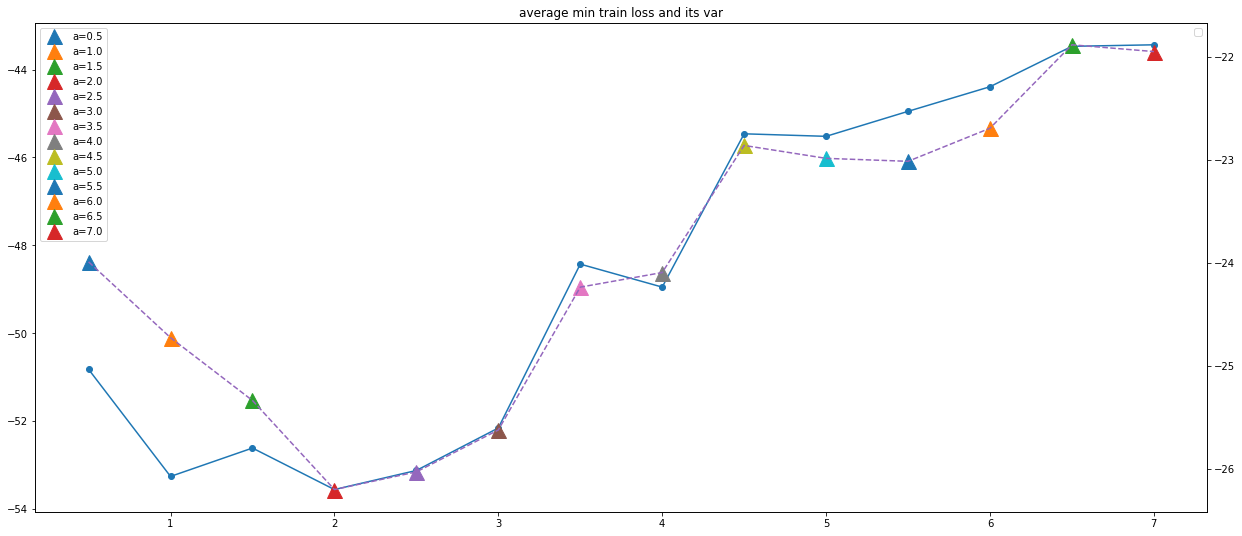

In [65]:
weight_range=np.array([0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0,5.5,6.0,6.5,7.0])
paramtar=np.array(['a=0.5','a=1.0','a=1.5','a=2.0','a=2.5','a=3.0','a=3.5','a=4.0','a=4.5','a=5.0','a=5.5','a=6.0','a=6.5','a=7.0'])

fig,ax1=plt.subplots(figsize=(21, 9))
ax2=ax1.twinx()
for i in range(14):
    ax2.plot(weight_range[i],np.log(average_min_trainloss[i]),'^',label=paramtar[i],markersize=15)
ax2.plot(weight_range,np.log(average_min_trainloss),'--')
ax1.plot(weight_range,np.log(trainloss_var),'-o',alpha=1)
ax2.legend(loc=0)
ax1.legend(loc=0)
plt.title("average min train loss and its var")

No handles with labels found to put in legend.


Text(0.5, 1.0, 'average min test loss and its var')

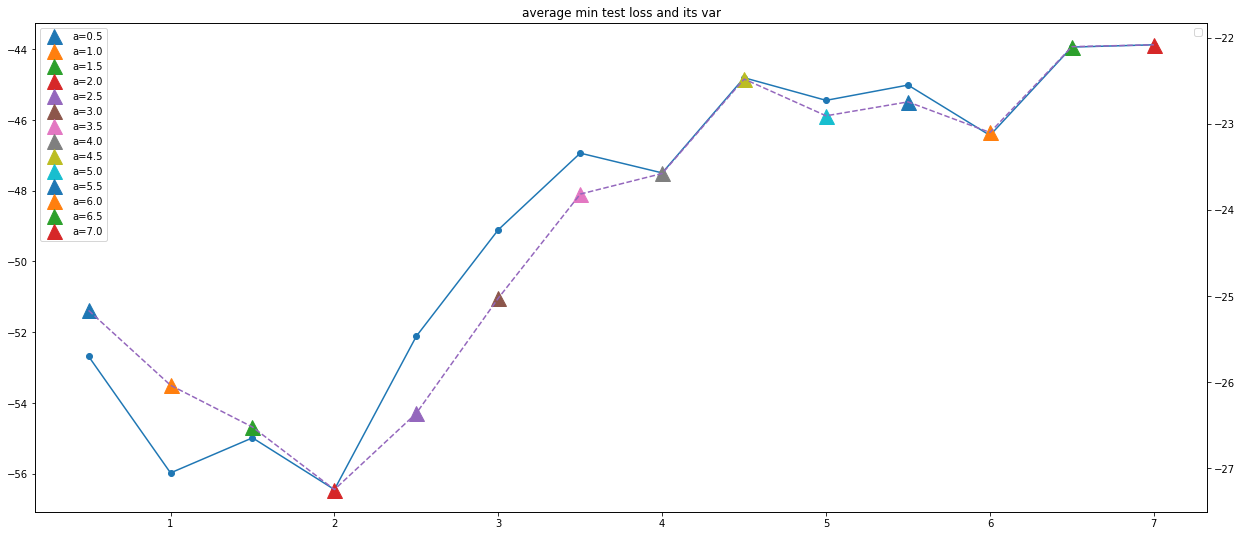

In [66]:
weight_range=np.array([0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0,5.5,6.0,6.5,7.0])
paramtar=np.array(['a=0.5','a=1.0','a=1.5','a=2.0','a=2.5','a=3.0','a=3.5','a=4.0','a=4.5','a=5.0','a=5.5','a=6.0','a=6.5','a=7.0'])

fig,ax1=plt.subplots(figsize=(21, 9))
ax2=ax1.twinx()
for i in range(14):
    ax2.plot(weight_range[i],np.log(average_min_testloss[i]),'^',markersize=15,label=paramtar[i])
ax2.plot(weight_range,np.log(average_min_testloss),'--')
ax1.plot(weight_range,np.log(testloss_var),'-o',alpha=1)
ax2.legend(loc=0)
ax1.legend(loc=0)
plt.title("average min test loss and its var")

No handles with labels found to put in legend.


Text(0.5, 1.0, 'average min train loss and its var')

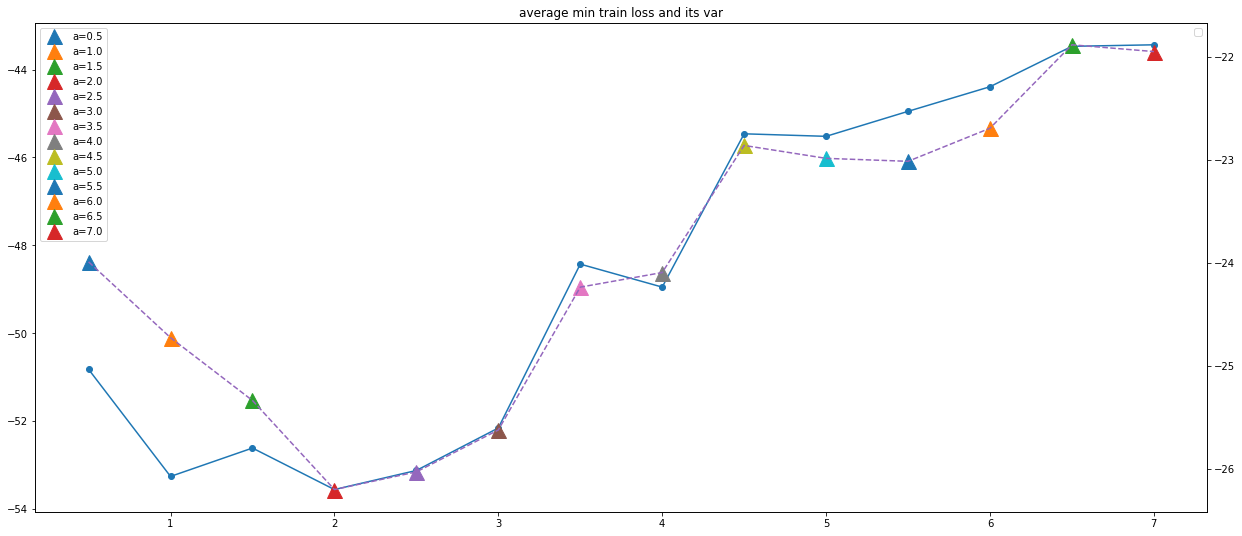

In [13]:
average_min_trainloss=np.load(r'C:\Users\dolin\Documents\machine learning\毕业论文\data0\average_min_trainloss.npy')

trainloss_var=np.load(r'C:\Users\dolin\Documents\machine learning\毕业论文\data0\trainloss_var.npy')

weight_range=np.array([0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0,5.5,6.0,6.5,7.0])
paramtar=np.array(['a=0.5','a=1.0','a=1.5','a=2.0','a=2.5','a=3.0','a=3.5','a=4.0','a=4.5','a=5.0','a=5.5','a=6.0','a=6.5','a=7.0'])

fig,ax1=plt.subplots(figsize=(21, 9))
ax2=ax1.twinx()
for i in range(14):
    ax2.plot(weight_range[i],np.log(average_min_trainloss[i]),'^',label=paramtar[i],markersize=15)
ax2.plot(weight_range,np.log(average_min_trainloss),'--')
ax1.plot(weight_range,np.log(trainloss_var),'-o',alpha=1)
ax2.legend(loc=0)
ax1.legend(loc=0)
plt.title("average min train loss and its var")

Text(0.5, 1.0, 'average min test loss and its variance')

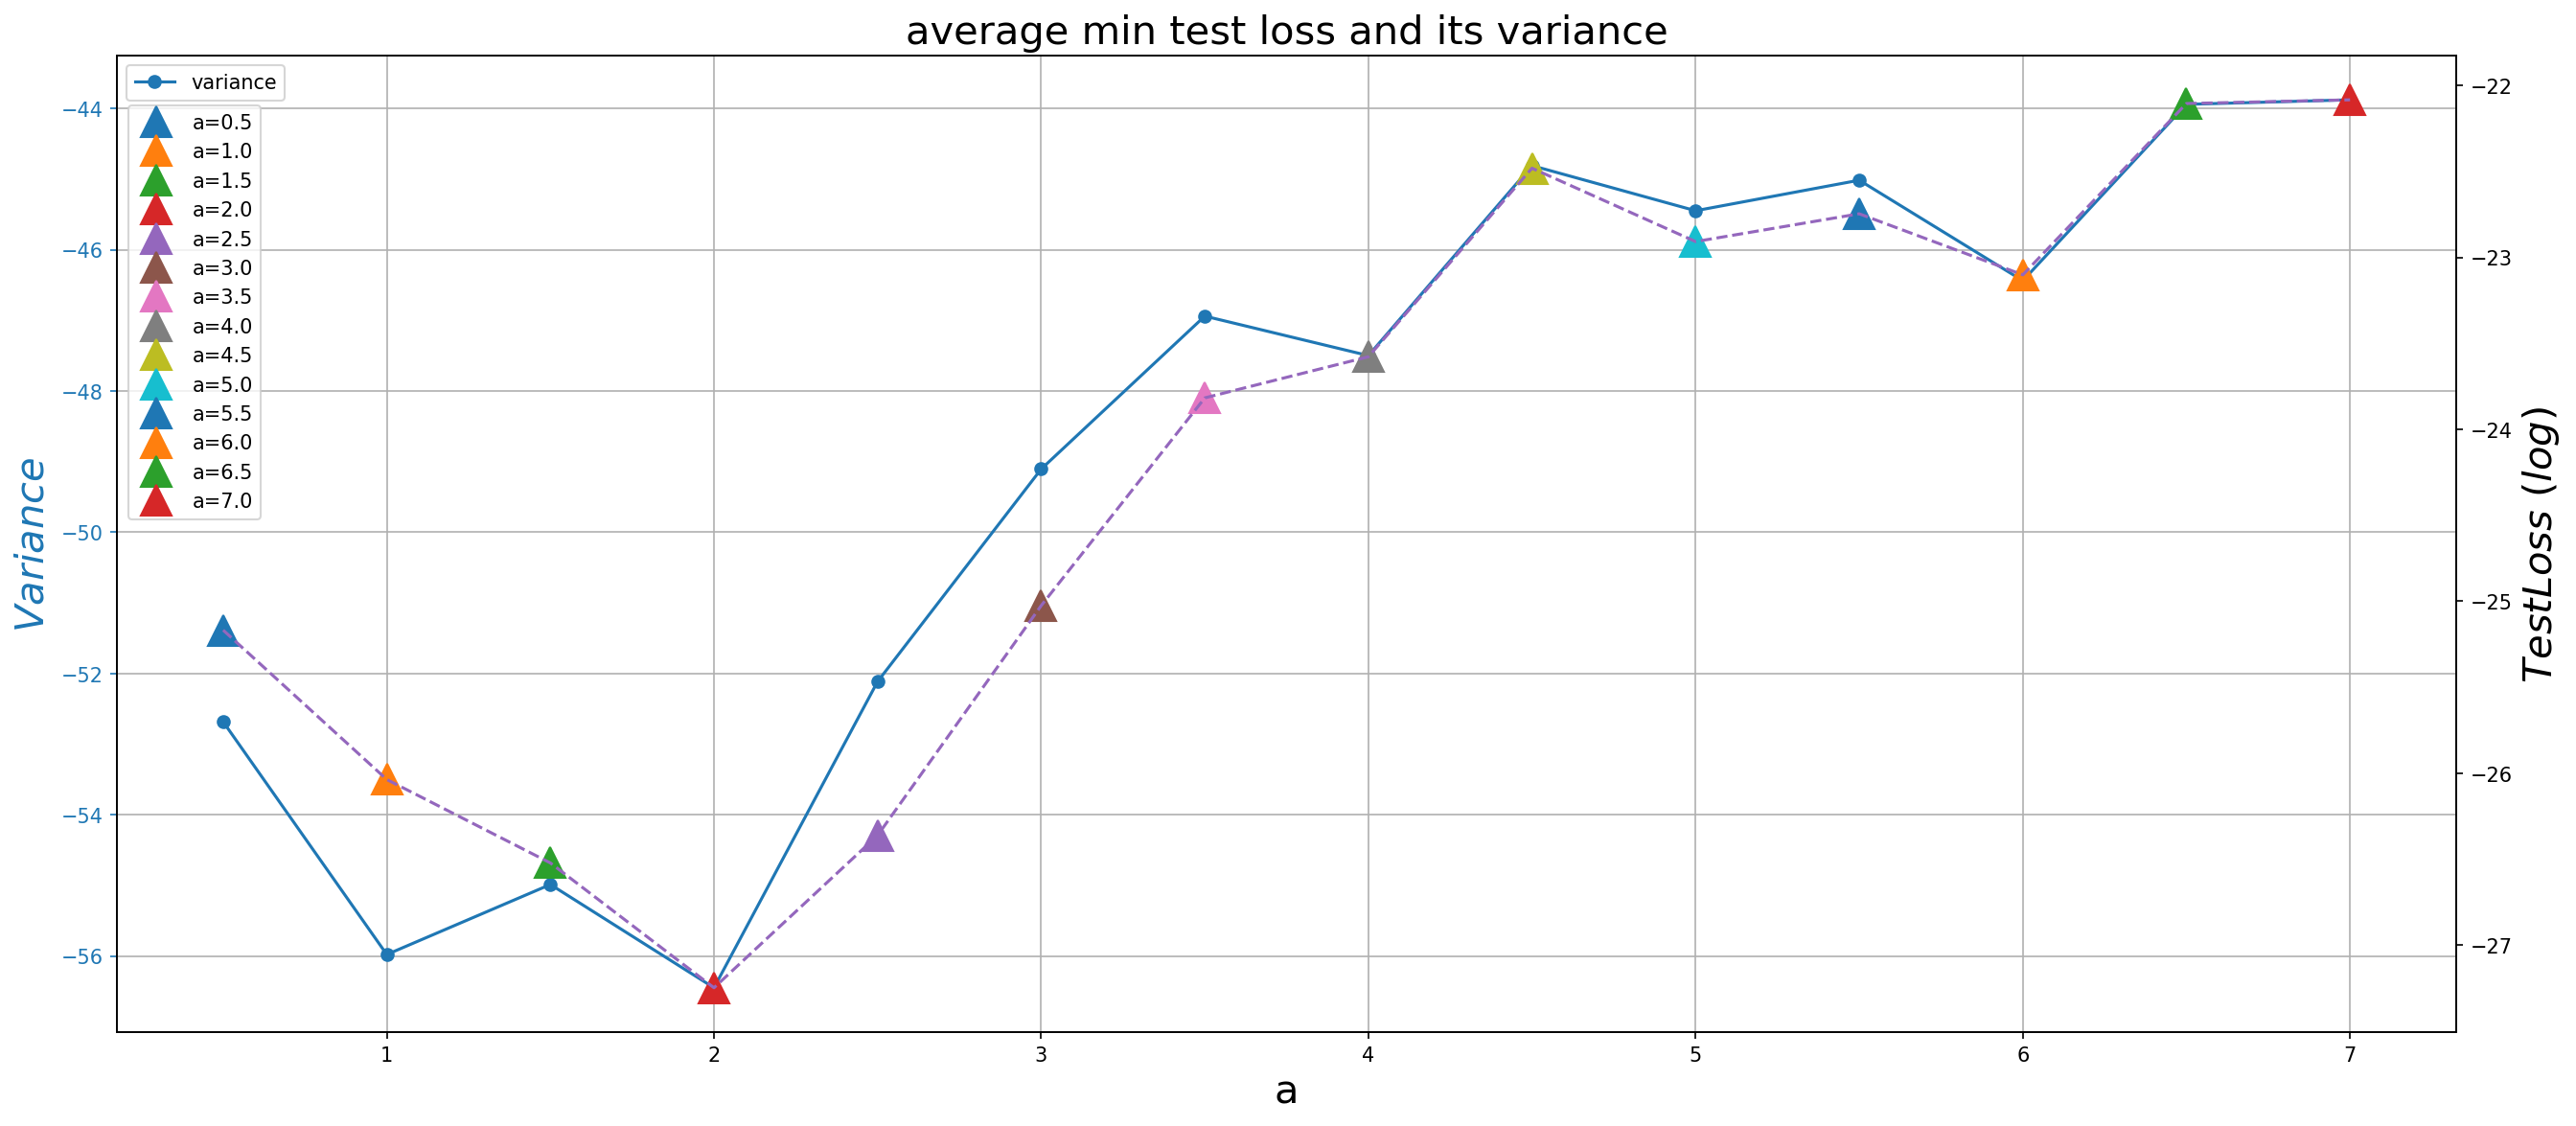

In [47]:
average_min_testloss=np.load(r'C:\Users\dolin\Documents\machine learning\毕业论文\data0\average_min_testloss.npy')

testloss_var=np.load(r'C:\Users\dolin\Documents\machine learning\毕业论文\data0\testloss_var.npy')

weight_range=np.array([0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0,5.5,6.0,6.5,7.0])
paramtar=np.array(['a=0.5','a=1.0','a=1.5','a=2.0','a=2.5','a=3.0','a=3.5','a=4.0','a=4.5','a=5.0','a=5.5','a=6.0','a=6.5','a=7.0'])

fig,ax1=plt.subplots(figsize=(21, 9),dpi=150)
ax2=ax1.twinx()
for i in range(14):
    ax2.plot(weight_range[i],np.log(average_min_testloss[i]),'^',label=paramtar[i],markersize=15)
ax2.plot(weight_range,np.log(average_min_testloss),'--')
p1, =ax1.plot(weight_range,np.log(testloss_var),'-o',alpha=1,label='variance')
ax1.set_xlabel('a',size=20)
ax1.set_ylabel('$Variance$',size=20,color=p1.get_color())
ax1.tick_params(axis='y',colors=p1.get_color())
ax2.set_ylabel('$Test Loss$ $(log)$',size=20)
ax2.legend(loc=(0.005,0.525))
ax1.legend()
ax1.grid(True)
plt.title("average min test loss and its variance",size=20)